In [1]:
#koading dataset
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Set paths
data_dir = "C:/Users/c.naga sai varun/Downloads/plant-pathology-2020-fgvc7/"
image_dir = os.path.join(data_dir, "images")
train_csv = os.path.join(data_dir, "train.csv")

# Load CSV file
df = pd.read_csv(train_csv)

# Display first few rows to understand structure
print(df.head())


  image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0


In [2]:
#Handling Missing Values
# Check for missing values
print("Missing values in dataset:\n", df.isnull().sum())

# If there are missing values, fill with zeros (or another method)
df.fillna(0, inplace=True)


Missing values in dataset:
 image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64


In [3]:
#encoding labels
# Create a multi-label binary classification
# Each label is a separate column (one-hot encoding)
labels = ["healthy", "multiple_diseases", "rust", "scab"]
df[labels] = df[labels].astype(int)  # Ensure binary values (0 or 1)

# Print sample encoded labels
print(df[labels].head())


   healthy  multiple_diseases  rust  scab
0        0                  0     0     1
1        0                  1     0     0
2        1                  0     0     0
3        0                  0     1     0
4        1                  0     0     0


In [4]:
#Image Preprocessing (Resizing & Normalization)
# Set image size
IMG_SIZE = 224  # Resize images to 224x224 (standard for CNNs)

# Create lists to store images and labels
X = []  # Images
y = []  # Corresponding labels

# Loop through dataset
for index, row in df.iterrows():
    img_path = os.path.join(image_dir, row["image_id"] + ".jpg")  # Construct image path
    image = cv2.imread(img_path)  # Read image
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # Resize
    image = image / 255.0  # Normalize pixel values (0-1)
    
    X.append(image)
    y.append(row[labels].values)  # Multi-label classification

# Convert to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Dataset loaded with {len(X)} images.")


Dataset loaded with 1821 images.


In [5]:
# Split dataset: 80% training, 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Validation samples: {len(X_val)}")


Training samples: 1456, Validation samples: 365


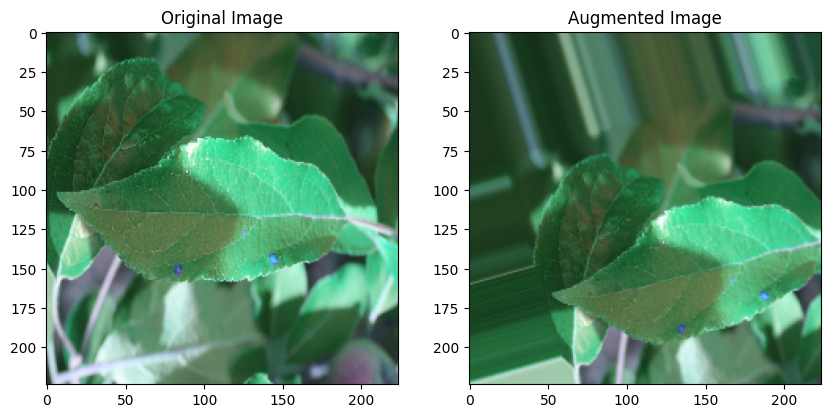

In [6]:
# Define data augmentation strategy
datagen = ImageDataGenerator(
    rotation_range=30,       # Rotate images randomly up to 30 degrees
    width_shift_range=0.2,   # Shift images horizontally
    height_shift_range=0.2,  # Shift images vertically
    shear_range=0.2,         # Shear transformation
    zoom_range=0.2,          # Zoom-in/out by up to 20%
    horizontal_flip=True,    # Flip image horizontally
    fill_mode="nearest"      # Fill missing pixels after transformation
)

# Apply augmentation only to training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Plot original vs augmented image
sample_image = X_train[0]  # Select a sample image
sample_image_expanded = np.expand_dims(sample_image, axis=0)  # Expand dimensions for batch processing
augmented_image = next(datagen.flow(sample_image_expanded))  # Generate augmented image

# Display original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(sample_image)
ax[0].set_title("Original Image")

ax[1].imshow(augmented_image[0])
ax[1].set_title("Augmented Image")

plt.show()



Dataset Shape: (1821, 5)

First Few Rows:
   image_id  healthy  multiple_diseases  rust  scab
0  Train_0        0                  0     0     1
1  Train_1        0                  1     0     0
2  Train_2        1                  0     0     0
3  Train_3        0                  0     1     0
4  Train_4        1                  0     0     0

Column Data Types:
 image_id             object
healthy               int64
multiple_diseases     int64
rust                  int64
scab                  int64
dtype: object

Unique Values Per Column:
 image_id             1821
healthy                 2
multiple_diseases       2
rust                    2
scab                    2
dtype: int64

Missing Values:
 image_id             0
healthy              0
multiple_diseases    0
rust                 0
scab                 0
dtype: int64


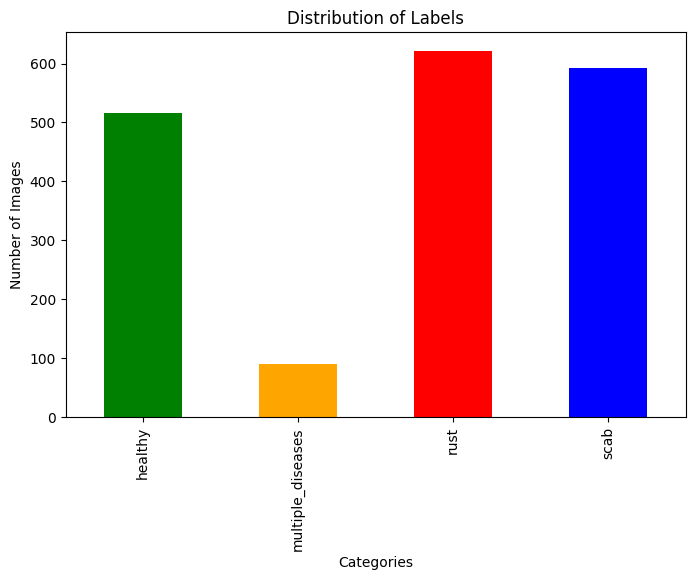

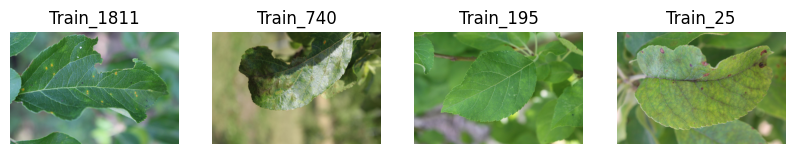


Most Common Image Sizes:
 Height  Width
1365    2048     1819
2048    1365        2
Name: count, dtype: int64


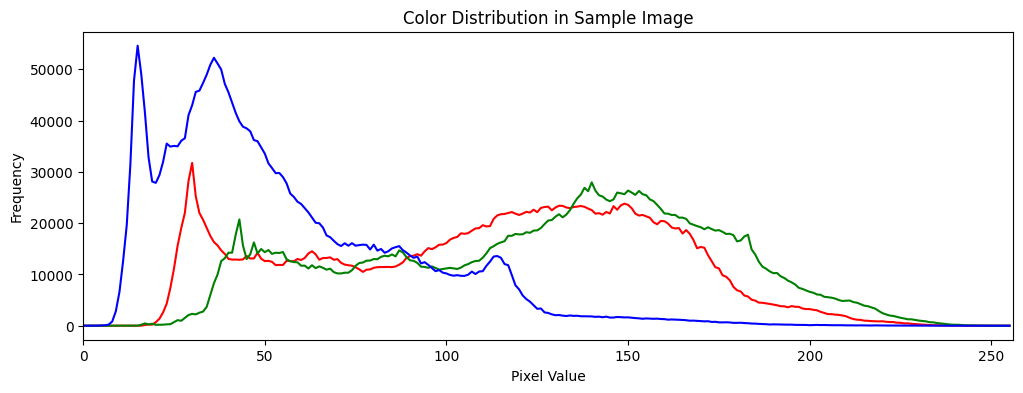

In [7]:
#Exploratory data analysis
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import random
from collections import Counter

# Set dataset paths
data_dir = "C:/Users/c.naga sai varun/Downloads/plant-pathology-2020-fgvc7/"
image_dir = os.path.join(data_dir, "images")
train_csv = os.path.join(data_dir, "train.csv")

# Load CSV file
df = pd.read_csv(train_csv)

# Print dataset shape and first few rows
print("\nDataset Shape:", df.shape)
print("\nFirst Few Rows:\n", df.head())

# Check column data types and unique values per column
print("\nColumn Data Types:\n", df.dtypes)
print("\nUnique Values Per Column:\n", df.nunique())

# Check for missing values and handle them if necessary
print("\nMissing Values:\n", df.isnull().sum())
df.fillna(0, inplace=True)

# Count occurrences of each class and visualize label distribution
label_counts = df.iloc[:, 1:].sum()
plt.figure(figsize=(8, 5))
label_counts.plot(kind='bar', color=['green', 'orange', 'red', 'blue'])
plt.title("Distribution of Labels")
plt.xlabel("Categories")
plt.ylabel("Number of Images")
plt.show()

# Display random sample images from the dataset
sample_images = random.sample(list(df["image_id"]), 4)
plt.figure(figsize=(10, 5))
for i, img_id in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_id + ".jpg")
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.subplot(1, 4, i + 1)
    plt.imshow(img)
    plt.title(img_id)
    plt.axis("off")

plt.show()

# Check image size variability
image_sizes = []
for img_id in df["image_id"]:
    img_path = os.path.join(image_dir, img_id + ".jpg")
    img = cv2.imread(img_path)
    if img is not None:
        image_sizes.append(img.shape[:2])

size_df = pd.DataFrame(image_sizes, columns=["Height", "Width"])
print("\nMost Common Image Sizes:\n", size_df.value_counts().head(10))

# Analyze color distribution in a sample image
img_path = os.path.join(image_dir, df.iloc[0]["image_id"] + ".jpg")
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 4))
colors = ('r', 'g', 'b')
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title("Color Distribution in Sample Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


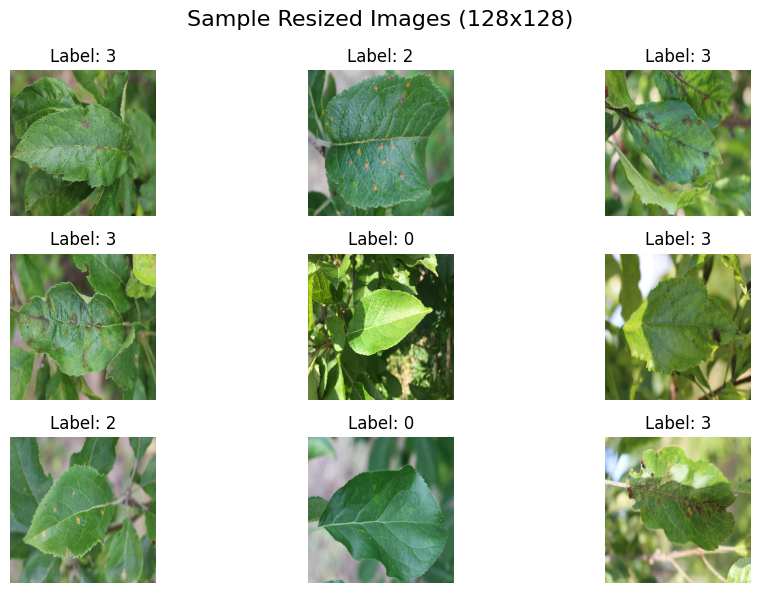

C:\Users\c.naga sai varun\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



📌 Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,631,364 (21.48 MB)

 Trainable params: 5,631,364 (21.48 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.3213 - loss: 1.5132 - val_accuracy: 0.3288 - val_loss: 1.2447
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 84s 2s/step - accuracy: 0.3071 - loss: 1.2577 - val_accuracy: 0.3699 - val_loss: 1.2251
Epoch 3/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.3407 - loss: 1.2518 - val_accuracy: 0.3288 - val_loss: 1.2280
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.3784 - loss: 1.2418 - val_accuracy: 0.4274 - val_loss: 1.1776
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.4333 - loss: 1.1878 - val_accuracy: 0.3836 - val_loss: 1.2070
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.4501 - loss: 1.1907 - val_accuracy: 0.5808 - val_loss: 1.1353
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.5238 - loss: 1.1053 - val_accuracy: 0.5616 - val_loss: 1.0964
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6356 - loss: 0.9326 - val_accuracy: 0.5534 - val_loss:

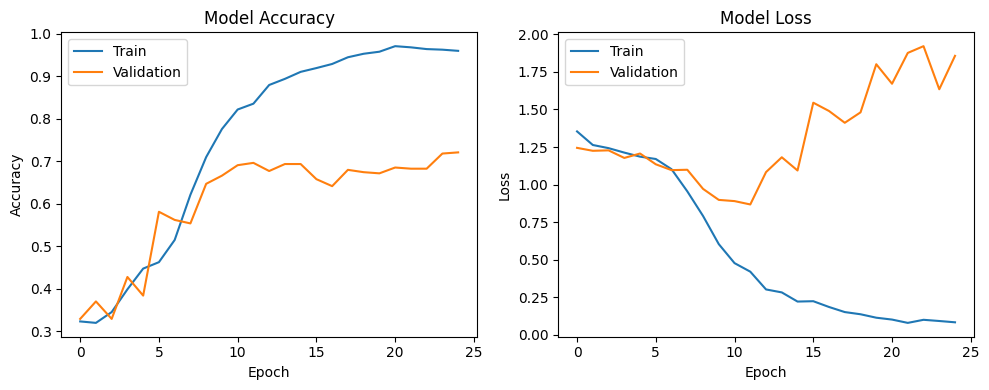

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# -------------------------------
# 📁 Set Paths
# -------------------------------
data_dir = "C:/Users/c.naga sai varun/Downloads/plant-pathology-2020-fgvc7/"
image_dir = os.path.join(data_dir, "images")
csv_path = os.path.join(data_dir, "train.csv")

# -------------------------------
# 📄 Load CSV File
# -------------------------------
df = pd.read_csv(csv_path)

# -------------------------------
# 📷 Image Preprocessing
# -------------------------------
IMG_SIZE = 224
NUM_CLASSES = 4
X = []
y = []

for i, row in df.iterrows():
    img_path = os.path.join(image_dir, row['image_id'] + '.jpg')
    image = cv2.imread(img_path)
    if image is not None:
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))  # ✅ Resize
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = image / 255.0  # Normalize
        label = np.argmax(row[1:].values)  # Assumes one-hot encoded labels
        X.append(image)
        y.append(label)

X = np.array(X)
y = to_categorical(np.array(y), num_classes=NUM_CLASSES)

# -------------------------------
# 🖼️ Show Sample Resized Images
# -------------------------------
import random
plt.figure(figsize=(10, 6))
for i in range(9):
    idx = random.randint(0, len(X) - 1)
    plt.subplot(3, 3, i + 1)
    plt.imshow(X[idx])
    plt.axis('off')
    plt.title(f"Label: {np.argmax(y[idx])}")
plt.suptitle("Sample Resized Images (128x128)", fontsize=16)
plt.tight_layout()
plt.show()

# -------------------------------
# 🔀 Train-Validation Split
# -------------------------------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------------
# 🧠 Build Basic CNN Model
# -------------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax')
])

# 📋 Print model summary
print("\n📌 Model Summary:")
model.summary()

# -------------------------------
# ⚙️ Compile the Model
# -------------------------------
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# -------------------------------
# 🏋️ Train the Model
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=32,
    verbose=1
)

# -------------------------------
# 💾 Save the Model
# -------------------------------
model.save("basic_cnn_plant_pathology.h5")

# -------------------------------
# 📈 Plot Accuracy & Loss
# -------------------------------
plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


C:\Users\c.naga sai varun\AppData\Local\Temp\ipykernel_1488\3986726218.py:59: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
C:\Users\c.naga sai varun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127807 (\N{HERB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


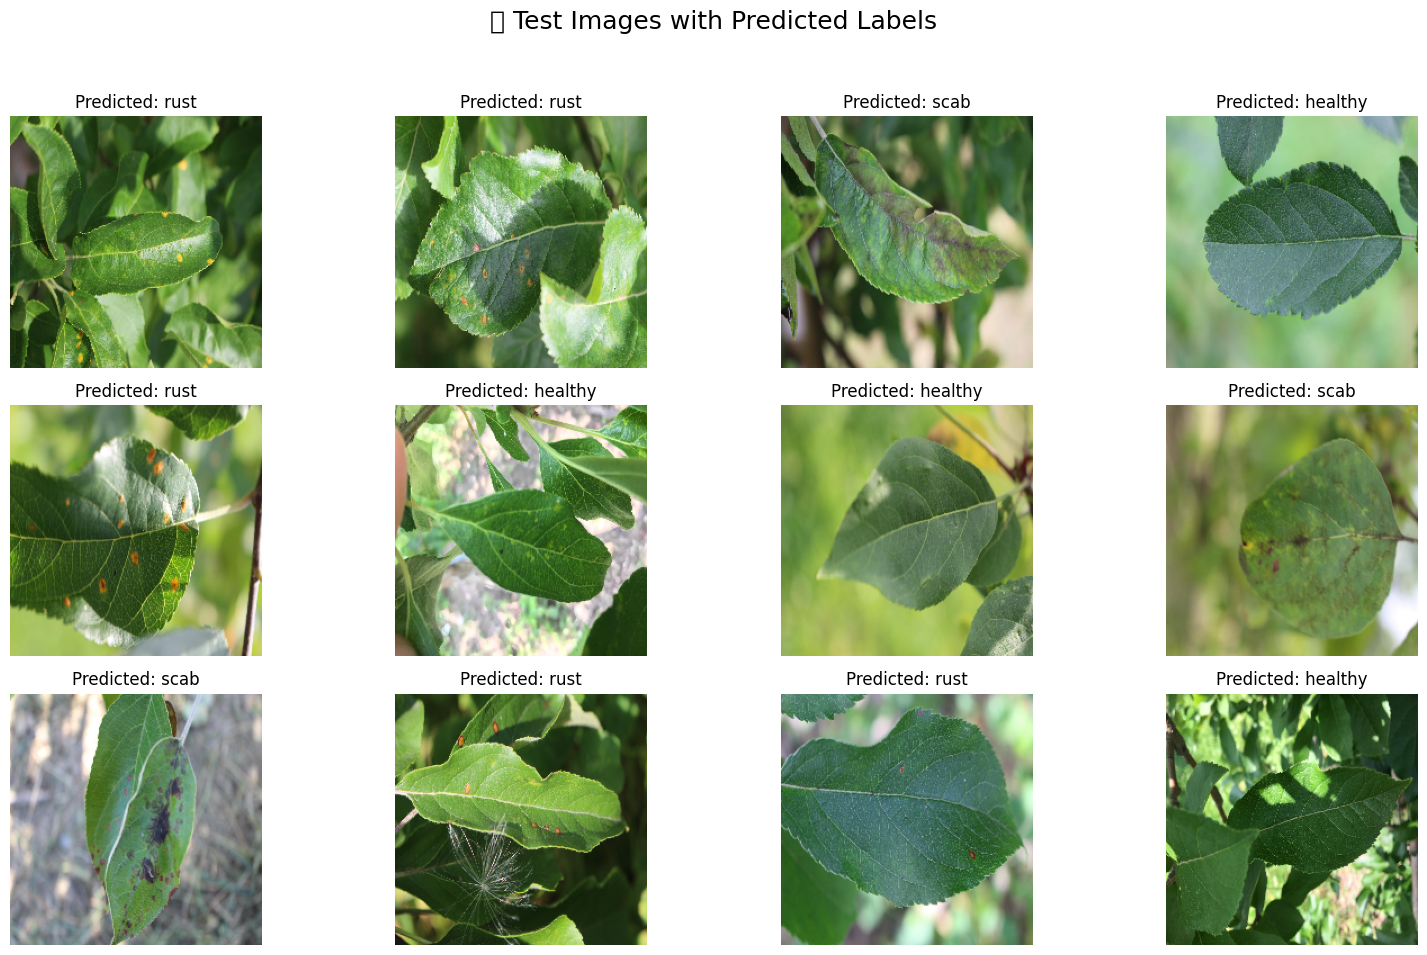

In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# ---------------------------
# 🔧 Configuration
# ---------------------------
data_dir = "C:/Users/c.naga sai varun/Downloads/plant-pathology-2020-fgvc7/"
test_csv_path = os.path.join(data_dir, "test.csv")
test_image_dir = os.path.join(data_dir, "images")
model_path = "basic_cnn_plant_pathology.h5"
IMG_SIZE = 224
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']  # Update this as per your class order

# ---------------------------
# 📦 Load Model
# ---------------------------
model = load_model(model_path)

# ---------------------------
# 📄 Load Test CSV
# ---------------------------
df_test = pd.read_csv(test_csv_path)

# ---------------------------
# 🖼 Display Predictions
# ---------------------------
num_images_to_display = 12
plt.figure(figsize=(16, 10))

for idx in range(min(num_images_to_display, len(df_test))):
    image_id = df_test.iloc[idx]['image_id']
    img_path = os.path.join(test_image_dir, image_id + ".jpg")

    img = cv2.imread(img_path)
    if img is None:
        continue

    # Preprocess for display and prediction
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_input = img_rgb / 255.0
    img_input = np.expand_dims(img_input, axis=0)

    # Predict
    pred = model.predict(img_input)
    predicted_class = class_names[np.argmax(pred)]

    # Plot
    plt.subplot(3, 4, idx + 1)
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_class}", fontsize=12)
    plt.axis('off')

plt.suptitle("🌿 Test Images with Predicted Labels", fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step


C:\Users\c.naga sai varun\AppData\Local\Temp\ipykernel_1488\954677996.py:21: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\c.naga sai varun\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


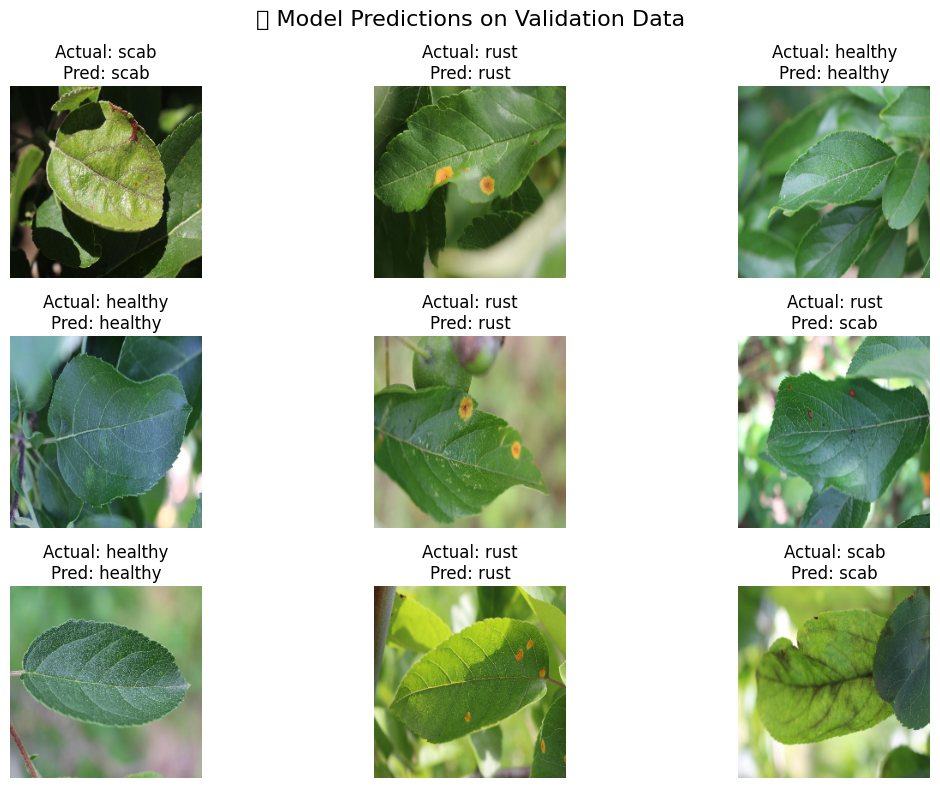

In [3]:
#preicted and tested few validation images
import matplotlib.pyplot as plt

# Class names (modify based on your actual CSV)
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']

# Predict classes
pred_probs = model.predict(X_val)
pred_labels = np.argmax(pred_probs, axis=1)
true_labels = np.argmax(y_val, axis=1)

# Show some predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    idx = np.random.randint(0, len(X_val))
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_val[idx])
    plt.axis('off')
    plt.title(f"Actual: {class_names[true_labels[idx]]}\nPred: {class_names[pred_labels[idx]]}")
plt.suptitle("🧪 Model Predictions on Validation Data", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------
# 1️⃣ Generate Predictions on Validation Set
# ------------------------------
y_pred_probs = model.predict(X_val)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_val, axis=1)

# ------------------------------
# 2️⃣ Confusion Matrix
# ------------------------------
cm = confusion_matrix(y_true, y_pred)
class_names = ['healthy', 'multiple_diseases', 'rust', 'scab']  # Modify if needed

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ------------------------------
# 3️⃣ Classification Report (Precision, Recall, F1-Score)
# ------------------------------
report = classification_report(y_true, y_pred, target_names=class_names)
print("📊 Classification Report:\n")
print(report)

# ------------------------------
# 4️⃣ Overall Accuracy
# ------------------------------
acc = accuracy_score(y_true, y_pred)
print(f"✅ Accuracy: {acc * 100:.2f}%")
